# PRÁCTICA N°7

##### **TEMA:** _CLUSTERING- APRENDIZAJE NO SUPERVISADO_

##### **INTEGRANTES:** 
#####                 _José Cueva_
#####                 _Estefanía Quimbiulco_

**Objetivos**
+ Analizar un dataset no etiquetado es decir sin variable de salida mediante
algoritmos de aprendizaje no supervisado.
+ Emplear Técnicas de Clustering o agrupamiento para clasificar los registros de
un dataset no eteiquetado.
+ Familiarizarse con el uso de phyton para realizar el análisis de un dataset
aplicando las librerías de modelado de datos.



In [48]:
import pandas as pd

In [49]:
path="EstacionesClimaticas.csv"

In [50]:
df=pd.read_csv(path)

**1. Análisis general y limpieza del dataset:**


Determinar el **tamaño** del dataset (Número de Registros y número de variables).

In [51]:
df.shape
# 1189 registros y 15 variables

(1189, 15)

Determinar el **tipo de dato** de cada una de las variables del dataset.

In [52]:
df.dtypes

Unnamed: 0                   int64
Nombre_Estacion             object
Latitud                    float64
Longitud                   float64
Temperatura-Media          float64
Periodo-STM                float64
Temperatura-Mensual-Max    float64
Periodo-STMV               float64
Temperatura-Mensual-Min    float64
Periodo-STmV               float64
Periodo-no-Nevado          float64
Precipitación-Total        float64
Periodo-SPV                float64
Nivel-Nieve                float64
Estacion-num                object
dtype: object

Verificar si existen **datos faltantes** en el dataset. 

In [53]:
import numpy as np

In [54]:
datos_faltantes=df.isnull()
for column in datos_faltantes.columns.values.tolist():
    print(column)
    print(datos_faltantes[column].value_counts())
    print("")

Unnamed: 0
False    1189
Name: Unnamed: 0, dtype: int64

Nombre_Estacion
False    1189
Name: Nombre_Estacion, dtype: int64

Latitud
False    1189
Name: Latitud, dtype: int64

Longitud
False    1189
Name: Longitud, dtype: int64

Temperatura-Media
False    1189
Name: Temperatura-Media, dtype: int64

Periodo-STM
False    1189
Name: Periodo-STM, dtype: int64

Temperatura-Mensual-Max
False    1189
Name: Temperatura-Mensual-Max, dtype: int64

Periodo-STMV
False    1189
Name: Periodo-STMV, dtype: int64

Temperatura-Mensual-Min
False    1188
True        1
Name: Temperatura-Mensual-Min, dtype: int64

Periodo-STmV
False    1188
True        1
Name: Periodo-STmV, dtype: int64

Periodo-no-Nevado
True     687
False    502
Name: Periodo-no-Nevado, dtype: int64

Precipitación-Total
False    1099
True       90
Name: Precipitación-Total, dtype: int64

Periodo-SPV
False    1099
True       90
Name: Periodo-SPV, dtype: int64

Nivel-Nieve
False    702
True     487
Name: Nivel-Nieve, dtype: int64

Estacion-n

Tratar los **datos faltantes**, es decir reemplazar con algún valor común o
eliminar los registros que presenten celdas con datos faltantes. Justificar el
procedimiento seleccionado.

In [55]:
media1=df["Temperatura-Mensual-Min"].mean()
media2=df["Periodo-STmV"].mean()
media3=df["Periodo-no-Nevado"].mean()
media4=df["Precipitación-Total"].mean()
media5=df["Periodo-SPV"].mean()
media6=df["Nivel-Nieve"].mean()

In [57]:
df["Temperatura-Mensual-Min"]=df["Temperatura-Mensual-Min"].replace(np.NaN,media1)
df["Periodo-STmV"]=df["Periodo-STmV"].replace(np.NaN,media2)
df["Periodo-no-Nevado"]=df["Periodo-no-Nevado"].replace(np.NaN,media3)
df["Precipitación-Total"]=df["Precipitación-Total"].replace(np.NaN,media4)
df["Periodo-SPV"]=df["Periodo-SPV"].replace(np.NaN,media5)
df["Nivel-Nieve"]=df["Nivel-Nieve"].replace(np.NaN,media6)

In [ ]:
#Reemplazamos los datos faltantes por la media, debido a que si se elimina los registros , se elimina más del 50% del dataset, 
#lo cual no sería factible

Modificar el **tipo de dato** de las variables de entrada que considere necesario.
Justificar el cambio.

In [ ]:
#No se necesita cambiar el tipo de dato.

Verificar nuevamente el **tamaño** del dataset después de la fase de análisis y
limpieza


In [61]:
df.shape

(1189, 15)

**2. Selección de datos:**


Analice las variables de entrada del dataset y seleccione las que considere
apropiadas para definir la variable x. Justifique su respuesta.

In [64]:
x=df[["Temperatura-Media","Periodo-STM","Temperatura-Mensual-Max","Periodo-STMV","Temperatura-Mensual-Min","Periodo-STmV","Periodo-no-Nevado","Precipitación-Total","Periodo-SPV","Nivel-Nieve"]]

In [65]:
x[0:5]

,Temperatura-Media,Periodo-STM,Temperatura-Mensual-Max,Periodo-STMV,Temperatura-Mensual-Min,Periodo-STmV,Periodo-no-Nevado,Precipitación-Total,Periodo-SPV,Nivel-Nieve
0,8.2,0.0,13.5,0.0,1.0,0.0,0.000000,178.8,0.0,0.000000
1,7.0,0.0,15.0,0.0,-3.0,0.0,0.000000,258.6,0.0,0.000000
2,6.8,13.0,16.0,9.0,-2.5,9.0,9.000000,264.6,9.0,30.512821
3,7.7,2.0,14.5,2.0,-1.0,2.0,2.000000,168.4,2.0,30.512821
4,8.8,0.0,13.1,0.0,1.9,0.0,2.366534,81.0,8.0,30.512821


Normalice los datos de la variable x, empleando cualquiera de los métodos
revisados en clase.


In [66]:
#Normalizar para que todas las variables den el mismo aporte al algoritmo
from sklearn.preprocessing import StandardScaler
x=np.nan_to_num(x)
x=StandardScaler().fit_transform(x)

In [67]:
x[0:5]

array([[ 1.96990536, -0.44463411,  1.2569335 , -0.42659628,  2.13307729,
        -0.41297551, -0.83994497,  2.08000987, -0.5616494 , -1.18956423],
       [ 1.84754897, -0.44463411,  1.44471859, -0.42659628,  1.81113199,
        -0.41297551, -0.83994497,  3.38792597, -0.5616494 , -1.18956423],
       [ 1.82715623,  2.19973275,  1.56990866,  1.74928876,  1.85137515,
         1.72116375,  2.35439119,  3.48626553,  1.47324958,  0.        ],
       [ 1.91892353, -0.03780844,  1.38212356,  0.05693373,  1.97210464,
         0.06127766, -0.13009249,  1.90955464, -0.10944963,  0.        ],
       [ 2.03108356, -0.44463411,  1.20685748, -0.42659628,  2.20551498,
        -0.41297551,  0.        ,  0.4770751 ,  1.24714969,  0.        ]])

**3.  Clustering-Agrupamiento**

Aplique la Técnica de clustering más apropiado para agrupar los registros del
dataset analizado. Justifique su respuesta.

Obtenga el modelo de clasificación con los métodos apropiados de acuerdo a
la técnica seleccionada.


In [70]:
#Clustering Jerarquico
#Para calcular distancias
from sklearn.metrics.pairwise import euclidean_distances
#calculamos la matriz de similaridad de orden nxn
matriz_similaridad=euclidean_distances(x,x)# todos los registros de columnas y filas
print(matriz_similaridad)

[[0.         1.36547707 5.84949608 ... 6.05809044 5.49013918 7.06655445]
 [1.36547707 0.         5.66292691 ... 6.53729606 5.98706358 7.55969667]
 [5.84949608 5.66292691 0.         ... 7.85658939 7.38926786 9.10354716]
 ...
 [6.05809044 6.53729606 7.85658939 ... 0.         0.97780365 1.63070183]
 [5.49013918 5.98706358 7.38926786 ... 0.97780365 0.         1.92656157]
 [7.06655445 7.55969667 9.10354716 ... 1.63070183 1.92656157 0.        ]]


In [71]:
#calcular distancias entre clusters con el metodo complete-Linkage      #distamcia max  entre puntos para que no se sobrelapen
from scipy.cluster import hierarchy
distancia_entreClusters=hierarchy.linkage(matriz_similaridad,"complete")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


Realice una gráfica que permita visualizar el resultado de la agrupación, o
clustering seleccionado.


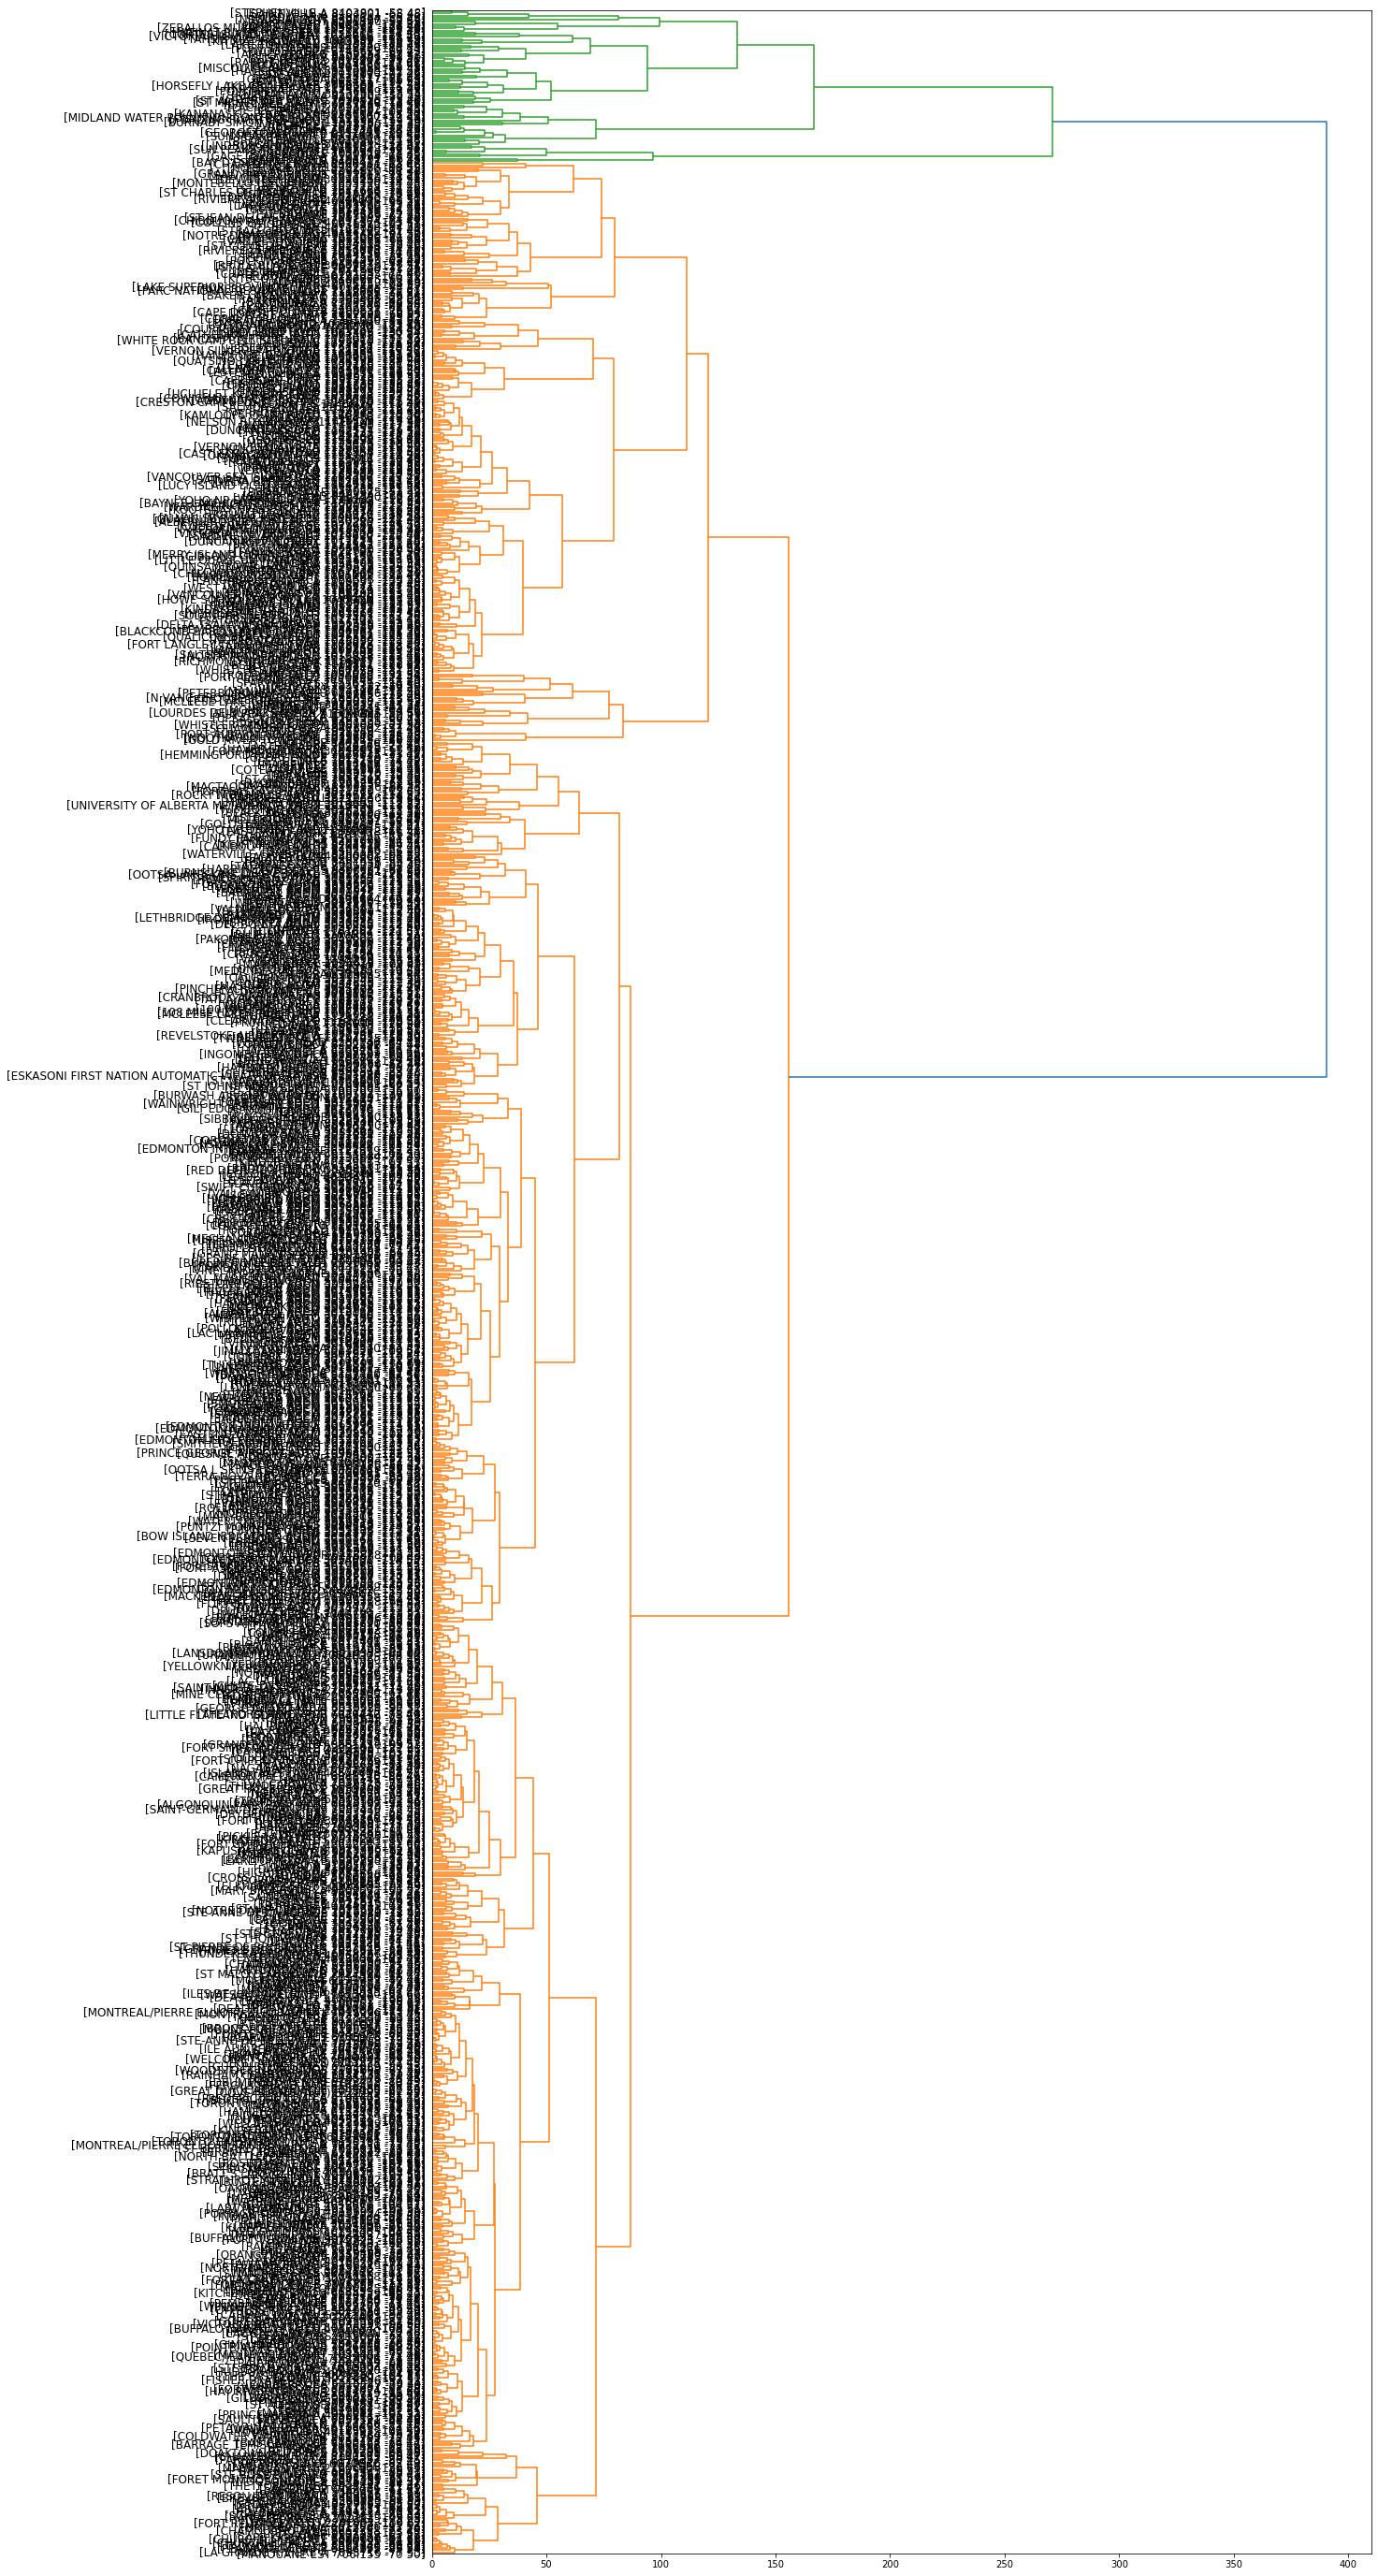

In [73]:
#Crear el dendograma con las variables
import pylab
fig = pylab.figure(figsize=(18,50))
#Definir leaf_label_func
def llf(id):
    return '[%s %s %s %s]'%(df["Nombre_Estacion"][id],df["Estacion-num"][id],int(float (df["Longitud"][id])),int(float (df["Latitud"][id])))
grafica_dendo=hierarchy.dendrogram(distancia_entreClusters,leaf_label_func=llf,leaf_rotation=0,leaf_font_size=12, orientation="right");

Muestre el resultado de la clasificación añadiendo las etiquetas asignadas a los
registros en el dataset.


In [74]:
from sklearn.cluster import AgglomerativeClustering

In [75]:
#Crear un objeto del metodo AgglomerativeClustering
#linkage= metodo para distancia  de separacion entre clusters
#(optativo) n_clusters  en agrupa jerar no es obligatorio
agc=AgglomerativeClustering(linkage="complete")
#ajuste o entrenamiento 
agc.fit(matriz_similaridad)
#Visualizamos as etiquetas, el cluster en el cual fueron clasificados los
agc.labels_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 0, ..., 1, 1, 1])

In [76]:
df["cluster"]=agc.labels_
df.head()

,Unnamed: 0,Nombre_Estacion,Latitud,Longitud,Temperatura-Media,Periodo-STM,Temperatura-Mensual-Max,Periodo-STMV,Temperatura-Mensual-Min,Periodo-STmV,Periodo-no-Nevado,Precipitación-Total,Periodo-SPV,Nivel-Nieve,Estacion-num,cluster
0,0,CHEMAINUS,48.935,-123.742,8.2,0.0,13.5,0.0,1.0,0.0,0.000000,178.8,0.0,0.000000,1011500,1
1,1,COWICHAN LAKE FORESTRY,48.824,-124.133,7.0,0.0,15.0,0.0,-3.0,0.0,0.000000,258.6,0.0,0.000000,1012040,1
2,2,LAKE COWICHAN,48.829,-124.052,6.8,13.0,16.0,9.0,-2.5,9.0,9.000000,264.6,9.0,30.512821,1012055,0
3,3,DUNCAN KELVIN CREEK,48.735,-123.728,7.7,2.0,14.5,2.0,-1.0,2.0,2.000000,168.4,2.0,30.512821,1012573,1
4,4,ESQUIMALT HARBOUR,48.432,-123.439,8.8,0.0,13.1,0.0,1.9,0.0,2.366534,81.0,8.0,30.512821,1012710,1
